# Week 1 — Python Fundamentals (Biology)


In [2]:
#import relevant libraries and read the sample dataset
import pandas as pd
df = pd.read_csv('simple_bio_lab_samples.csv')
df.head()

,sample_id,species,sample_type,weight_mg,pH
0,1,Oryza sativa,stem,20.56,6.75
1,2,Solanum lycopersicum,root,320.02,4.79
2,3,Arabidopsis thaliana,root,160.61,5.07
3,4,Oryza sativa,seed,256.74,7.64
4,5,Oryza sativa,root,454.25,6.62


In [41]:
#getting the description of the data to know what I am dealing with
df.info()
df.describe(include= "all").round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sample_id     100 non-null    int64  
 1   species       100 non-null    object 
 2   sample_type   100 non-null    object 
 3   weight_mg     100 non-null    float64
 4   pH            100 non-null    float64
 5   weight_grams  100 non-null    float64
 6   ph_category   100 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 5.6+ KB


,sample_id,species,sample_type,weight_mg,pH,weight_grams,ph_category
count,100.00,100,100,100.00,100.00,100.00,100
unique,NaN,4,4,NaN,NaN,NaN,3
top,NaN,Solanum lycopersicum,stem,NaN,NaN,NaN,acidic
freq,NaN,30,30,NaN,NaN,NaN,51
mean,50.50,NaN,NaN,251.43,6.31,0.25,NaN
std,29.01,NaN,NaN,145.09,1.03,0.15,NaN
min,1.00,NaN,NaN,8.44,4.52,0.01,NaN
25%,25.75,NaN,NaN,124.79,5.47,0.12,NaN
50%,50.50,NaN,NaN,255.29,6.47,0.26,NaN
75%,75.25,NaN,NaN,384.26,7.13,0.38,NaN


In [13]:
#analyse the data by pH
low_pH = df[df["pH" ]< 6]
low_pH.head() 

,sample_id,species,sample_type,weight_mg,pH
1,2,Solanum lycopersicum,root,320.02,4.79
2,3,Arabidopsis thaliana,root,160.61,5.07
5,6,Solanum lycopersicum,root,128.40,4.53
6,7,Arabidopsis thaliana,root,208.14,4.86
8,9,Oryza sativa,root,118.26,4.52


In [14]:
low_pH.shape

(39, 5)

In [17]:
high_pH = df[df["pH"] > 7]
high_pH.shape, high_pH.head()

((28, 5),
     sample_id               species sample_type  weight_mg    pH
 3           4          Oryza sativa        seed     256.74  7.64
 17         18  Solanum lycopersicum        root      97.35  7.11
 19         20          Oryza sativa        leaf     271.97  7.47
 26         27              Zea mays        root     409.92  7.91
 28         29  Solanum lycopersicum        seed       8.44  7.62)

In [18]:
#obtain the number of different species
counts = df['species'].value_counts().rename_axis('species').reset_index(name = 'count')
counts

,species,count
0,Solanum lycopersicum,30
1,Zea mays,26
2,Oryza sativa,24
3,Arabidopsis thaliana,20


In [21]:
# obtain the average weight of the samples species
average_weight = df.groupby('species')['weight_mg'].mean().round(2).reset_index()
average_weight.rename(columns = {'weight_mg':'average_weight'}, inplace = True)
average_weight

,species,average_weight
0,Arabidopsis thaliana,290.61
1,Oryza sativa,266.02
2,Solanum lycopersicum,211.53
3,Zea mays,253.85


In [23]:
#save the weight summary to csv
average_weight.to_csv('simple_bio_lab_samples_1.csv', index = False)

In [24]:
# simple weight conversion to grams 
df['weight_grams'] = (df['weight_mg']/1000).round(4)
df.head(6)

,sample_id,species,sample_type,weight_mg,pH,weight_grams
0,1,Oryza sativa,stem,20.56,6.75,0.0206
1,2,Solanum lycopersicum,root,320.02,4.79,0.3200
2,3,Arabidopsis thaliana,root,160.61,5.07,0.1606
3,4,Oryza sativa,seed,256.74,7.64,0.2567
4,5,Oryza sativa,root,454.25,6.62,0.4542
5,6,Solanum lycopersicum,root,128.40,4.53,0.1284


In [26]:
# categorise the samples according to pH
def ph_category(ph):
    if pd.isna(ph):
        return 'unknown'
    if ph < 6.5:
        return 'acidic'
    if ph <= 7.5:
        return 'neutral'
    else:
        return 'basic'

df['ph_category'] = df['pH'].apply(ph_category)
df['ph_category'].value_counts().rename_axis('ph_categroy').reset_index(name = 'count')

,ph_categroy,count
0,acidic,51
1,neutral,34
2,basic,15


In [29]:
#save to csv
clean_path = 'simple_bio_lab_sample_clean.csv'
df.to_csv(clean_path, index = False)

In [35]:
#summarise the Ph categories by the sample type
summary = df.groupby(['sample_type', 'ph_category']).size().rename_axis(['sample_type','ph_category']).reset_index(name = 'count')
summary

,sample_type,ph_category,count
0,leaf,acidic,11
1,leaf,basic,4
2,leaf,neutral,11
3,root,acidic,13
4,root,basic,2
5,root,neutral,5
6,seed,acidic,10
7,seed,basic,5
8,seed,neutral,9
9,stem,acidic,17


In [43]:
#pivot the table for easier interpretation
plot_data = summary.pivot(index = 'sample_type', columns = 'ph_category', values = 'count').fillna(0)
plot_data


ph_category,acidic,basic,neutral
sample_type,,,
leaf,11,4,11
root,13,2,5
seed,10,5,9
stem,17,4,9


In [ ]:
plot_data.to_csv('sample_type_summary.csv')

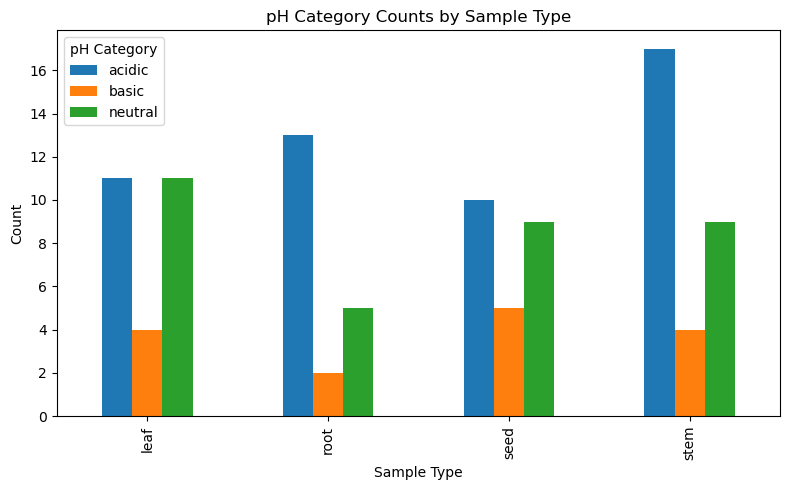

In [38]:
#Visualise the data to gain key insights
plot_data.plot(kind='bar', figsize=(8,5))

plt.title("pH Category Counts by Sample Type")
plt.xlabel("Sample Type")
plt.ylabel("Count")
plt.legend(title="pH Category")
plt.tight_layout()
plt.show()


In [48]:
plt.savefig("week1_ph_by_sample_type.png", dpi=150)

<Figure size 640x480 with 0 Axes>

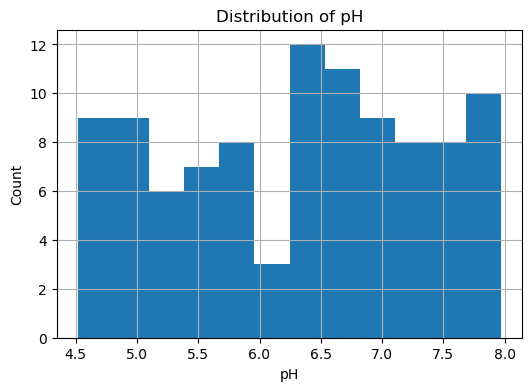

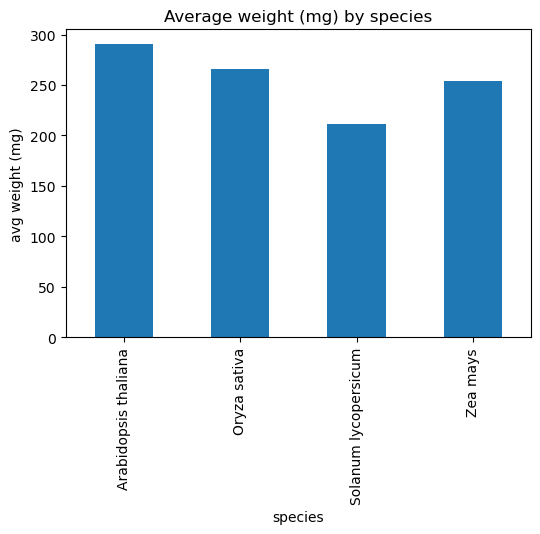

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df["pH"], bins=12)
plt.title("Distribution of pH")
plt.xlabel("pH")
plt.ylabel("Count")
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
species_means = df.groupby("species")["weight_mg"].mean()
species_means.plot(kind="bar")
plt.title("Average weight (mg) by species")
plt.ylabel("avg weight (mg)")
plt.show()


In [47]:
plt.savefig("week1_ph_by_sample_type.png", dpi=150)

<Figure size 640x480 with 0 Axes>

## MINI REPORT

### FINDINGS

#### Dataset overview
1. Number of samples: 100
2. Different species found: 4, namely; 
    a. ***Arabidopsisi thaliana***
    b. ***Oryza sativa***
    c. ***Solanum lycopersicum***
    d. ***Zea mays***
#### pH Distribution 
1. Samples were categorised into acidic, neutral and basic
2. The sample type with the most acidic observations was stem, therefore stem samples tended to have lower pH than the other sample types. 
#### Sample weights
1. Mean sample weights varied cross species
2. ***Arabidopsis thaliana*** weighed the most  with a mean weight of 290. 61mg while ***Solanum lycopersicum*** weighed the least with a mean weight of 211.53mg

## TASKS COMPLETED
+ Loaded sample dataset
+  Performed filtering, grouping, and feature creation
+ Saved cleaned dataset and summary tables
+ Basic visualizations and mini-report

In [44]:
# Cell 11 — Mastery automated checks
errors = []

# 1. CSV loaded
if df.empty:
    errors.append("Dataset is empty")

# 2. columns present
required_cols = {"sample_id","species","sample_type","weight_mg","pH","weight_grams","pH_category"}
if not required_cols.issubset(set(df.columns)):
    errors.append(f"Missing columns: {required_cols - set(df.columns)}")

# 3. numeric types
if not pd.api.types.is_numeric_dtype(df["weight_mg"]):
    errors.append("weight_mg is not numeric")
if not pd.api.types.is_numeric_dtype(df["pH"]):
    errors.append("pH is not numeric")

# 4. sensible ranges
if df["weight_mg"].min() < 0 or df["pH"].min() < 0:
    errors.append("Some numeric values out of expected range")

if errors:
    print("Checks failed:")
    for e in errors:
        print("-", e)
else:
    print("All checks passed — Week 1 mastery base reached ✅")


Checks failed:
- Missing columns: {'pH_category'}


In [49]:
git add week1_python_bio.ipynb week1_simple_bio_lab_samples_clean.csv week1_species_counts.csv week1_avg_weight_by_species.csv week1_ph_by_sample_type.png
git commit -m "Week1: Python fundamentals notebook + cleaned dataset + summaries"
git push


SyntaxError: invalid syntax (2164156579.py, line 1)